In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import choice


In [50]:
data = pd.read_csv("Iris.csv")
data.columns = ["id","s_length","s_width","p_length","p_width","target"]
data.head()

id  s_length  s_width  p_length  p_width       target
0   1       5.1      3.5       1.4      0.2  Iris-setosa
1   2       4.9      3.0       1.4      0.2  Iris-setosa
2   3       4.7      3.2       1.3      0.2  Iris-setosa
3   4       4.6      3.1       1.5      0.2  Iris-setosa
4   5       5.0      3.6       1.4      0.2  Iris-setosa

In [51]:
data.shape

(150, 6)

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
id          150 non-null int64
s_length    150 non-null float64
s_width     150 non-null float64
p_length    150 non-null float64
p_width     150 non-null float64
target      150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


In [53]:
data.sample(6)

id  s_length  s_width  p_length  p_width           target
62  63       6.0      2.2       4.0      1.0  Iris-versicolor
10  11       5.4      3.7       1.5      0.2      Iris-setosa
70  71       5.9      3.2       4.8      1.8  Iris-versicolor
66  67       5.6      3.0       4.5      1.5  Iris-versicolor
22  23       4.6      3.6       1.0      0.2      Iris-setosa
65  66       6.7      3.1       4.4      1.4  Iris-versicolor

In [54]:
help(data.sample)

Help on method sample in module pandas.core.generic:

sample(n=None, frac=None, replace=False, weights=None, random_state=None, axis=None) method of pandas.core.frame.DataFrame instance
    Return a random sample of items from an axis of object.
    
    You can use `random_state` for reproducibility.
    
    Parameters
    ----------
    n : int, optional
        Number of items from axis to return. Cannot be used with `frac`.
        Default = 1 if `frac` = None.
    frac : float, optional
        Fraction of axis items to return. Cannot be used with `n`.
    replace : bool, default False
        Sample with or without replacement.
    weights : str or ndarray-like, optional
        Default 'None' results in equal probability weighting.
        If passed a Series, will align with target object on index. Index
        values in weights not found in sampled object will be ignored and
        index values in sampled object not in weights will be assigned
        weights of zero.
      

In [55]:
data.target.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [56]:
colours = {'Iris-setosa':'green', 'Iris-versicolor':'blue', 'Iris-virginica':'red'}

In [57]:
for i in range(data.shape[0]):
    data.at[i,"color_label"] = colours[data.iloc[i].target]

In [58]:
data.head()

id  s_length  s_width  p_length  p_width       target color_label
0   1       5.1      3.5       1.4      0.2  Iris-setosa       green
1   2       4.9      3.0       1.4      0.2  Iris-setosa       green
2   3       4.7      3.2       1.3      0.2  Iris-setosa       green
3   4       4.6      3.1       1.5      0.2  Iris-setosa       green
4   5       5.0      3.6       1.4      0.2  Iris-setosa       green

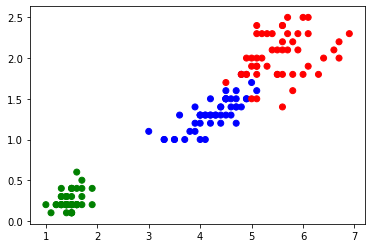

In [59]:
plt.scatter(data.p_length,data.p_width,c=data.color_label)

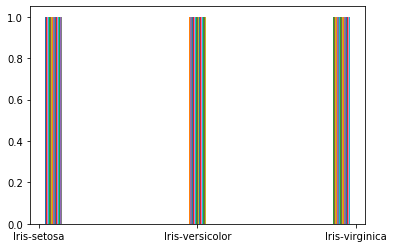

In [60]:
plt.hist(data.target,bins=5)
plt.show()

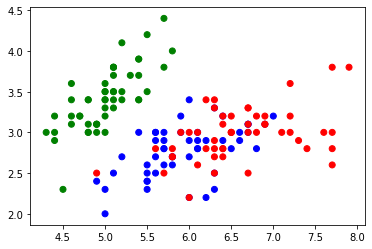

In [61]:
plt.scatter(data.s_length,data.s_width,c=data.color_label)


In [62]:
X = data[["s_length","s_width","p_length","p_width"]]
y = data["target"]

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25)

In [64]:
print(X_test.shape, X_train.shape, y_test.shape, y_train.shape)

(38, 4) (112, 4) (38,) (112,)


In [65]:
from sklearn.linear_model import LogisticRegression as log
model = log()
print(model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


In [66]:
model.fit(X_train,y_train)

c:\users\dell\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\dell\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
print(X_test.iloc[:10])

     s_length  s_width  p_length  p_width
26        5.0      3.4       1.6      0.4
75        6.6      3.0       4.4      1.4
3         4.6      3.1       1.5      0.2
63        6.1      2.9       4.7      1.4
105       7.6      3.0       6.6      2.1
148       6.2      3.4       5.4      2.3
80        5.5      2.4       3.8      1.1
28        5.2      3.4       1.4      0.2
134       6.1      2.6       5.6      1.4
104       6.5      3.0       5.8      2.2


In [69]:
print(y_test.iloc[:10])

26         Iris-setosa
75     Iris-versicolor
3          Iris-setosa
63     Iris-versicolor
105     Iris-virginica
148     Iris-virginica
80     Iris-versicolor
28         Iris-setosa
134     Iris-virginica
104     Iris-virginica
Name: target, dtype: object


In [70]:
print(model.predict(X_test.iloc[:10]))

['Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica']


In [71]:
print(y_test.iloc[:10].values)

['Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica']


In [72]:
predicted = model.predict( X_test )
original =y_test.values
wrong = 0
for i in range(len(predicted)):
    if predicted[i] != original[i]:
        wrong = wrong + 1
print(wrong)        

0


In [73]:
model.score(X_test,y_test)

1.0

ValueError: x and y must be the same size

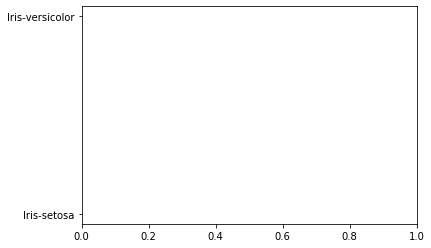

In [76]:
plt.scatter()